In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Data Loading and Cleaning

In [ ]:
#Loading Dataset

df = pd.read_csv("Healthcare Dataset.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# Drop irrelevant columns
df = df.drop(columns=["PatientId", "AppointmentID"])

In [ ]:
# Rename columns for consistency
df = df.rename(columns={"Hipertension": "Hypertension", "Handcap": "Handicap"})

In [ ]:
# Convert 'No-show' column to binary (Yes=1, No=0)
df["No-show"] = df["No-show"].map({"Yes": 1, "No": 0})


In [ ]:
# Convert date columns to datetime
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

In [ ]:
# Extract day of week from appointment day
df["DayOfWeek"] = df["AppointmentDay"].dt.day_name()

In [ ]:
# Remove invalid ages (negative values)
df = df[df["Age"] >= 0]

## Exploratory Data Analysis

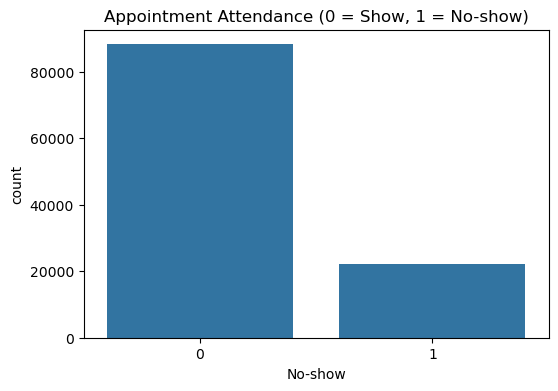

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="No-show")
plt.title("Appointment Attendance (0 = Show, 1 = No-show)")
plt.show()

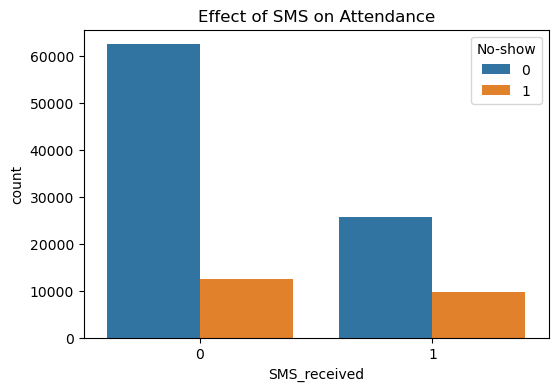

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="SMS_received", hue="No-show")
plt.title("Effect of SMS on Attendance")
plt.show()


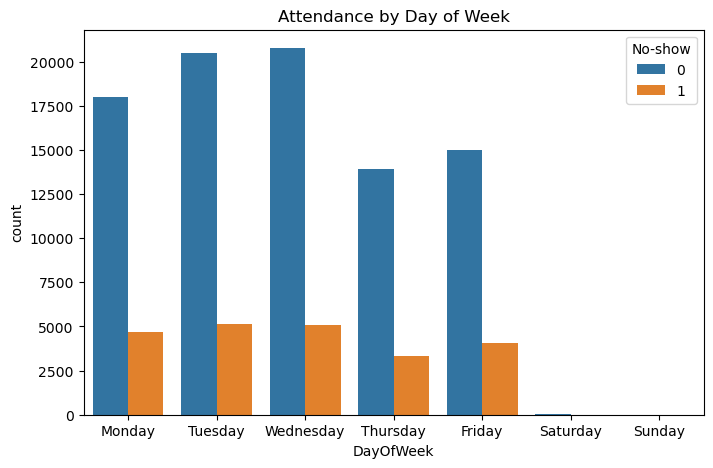

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="DayOfWeek", hue="No-show",
order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Attendance by Day of Week")
plt.show()
